<a href="https://colab.research.google.com/github/BryanSqq/AI-learning-tasks/blob/main/%E7%AC%AC%E4%B8%80%E5%A0%82AI%E5%AD%B8%E7%BF%92%E8%AA%B2(%E7%B0%A1%E5%96%AE%E5%98%97%E8%A9%A6%E8%A8%93%E7%B7%B4%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

這是開始AI學習的第一步，首先要瞭解到，AI所處理的基本格式就是"矩陣"，
建立一個 3x3 的矩陣，了解何謂矩陣。

In [ ]:
import numpy as np

#建立一 3x3 的矩陣，這就是 AI 處理數據的基本格式
data = np.array([[1,2,3],[4,5,6],[7,8,9]])
print ("My first AI array: \n", data)
print ("shape of array:", data.shape)

My first AI array: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
shape of array: (3, 3)


在AI訓練中，有許多的矩陣運算，透過矩陣運算，得到最佳的參數。

In [2]:
import numpy as np
# create a two-dimenision metrix
matrix = np.array([[1,2],[3,4]])
# 矩陣轉置 (Transposing) - 這是神經網路常用的運算
print("origenal matrix: \n", matrix)
print("Transposed matrix: \n", matrix.T)

print("矩陣平方: \n", np.dot(matrix, matrix))

origenal matrix: 
 [[1 2]
 [3 4]]
Transposed matrix: 
 [[1 3]
 [2 4]]
矩陣平方: 
 [[ 7 10]
 [15 22]]


在AI訓練的過程中，會使用到pandas套件，這是一個跟NumPy一樣在數據處理上，有著相當完整的工具，二者都是相當常用的工具。

In [ ]:
import pandas as pd
# creat a simple student score table
data = {
    'name':['Ming','Hwan', 'Red'],
    'Math': [95,80,88],
    'Engnerring': [100,75,92]
    }
df = pd.DataFrame(data)
# countting average of each subjct
print("score table:\n",df)
print("average score:\n",df.mean(numeric_only=True))

score table:
    name  Math  Engnerring
0  Ming    95         100
1  Hwan    80          75
2   Red    88          92
average score:
 Math          87.666667
Engnerring    89.000000
dtype: float64


正式進入機器學習的步驟，我們要訓練一個「手寫數字辨識器」，透過sklearn套件能快速建立訓練所需的數據，matplotlib套件就是搭配將樣本顯示出來的工具。

<Figure size 640x480 with 0 Axes>

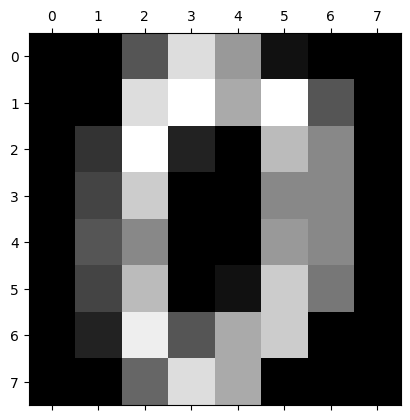

the lable of this graph is:  0
data.shape:  (8, 8)
data reshape:  (64,)


In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

# 1. loading digits dataset
digits = datasets.load_digits()

# 2.show what does the first graph look like :)
plt.gray()
plt.matshow(digits.images[0])
plt.show()

print("the lable of this graph is: ", digits.target[0])

# get the number of graphes
n_samples = len(digits.images)

# make 8x8 matrix into one line 64 numbers
data = digits.images.reshape((n_samples, -1))
print("data.shape: ", digits.images[0].shape)
print("data reshape: ", data[0].shape)

我們選擇SVM作為分類器的基本模型，在這裡我嘗試兩種"超參數"進行訓練，多嘗試超參數，是機器學習中必經的過程，透過不同的組合，達到最佳的訓練結果(手動設定不是最好的方式，後面有更快的)

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

# separate dataset into training set and testing set (using 80% of dataset for training, and the remaining part for testing)
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

# creat a AI classifier
clf1 = svm.SVC(gamma=0.001)
clf2 = svm.SVC(gamma=0.0011, C=100.0)

# train the AI classifier
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

SVC(C=100.0, gamma=0.0011)

訓練出的2個模型，準確率有著些微的差異，不斷嘗試超參數的組合，使準確率達到最佳，就是機器學習的核心概念。

In [ ]:
predicted_by_clf1 = clf1.predict(X_test)
predicted_by_clf2 = clf2.predict(X_test)

# 顯示預測結果與實際圖片
# for i in range(10):
#     plt.gray()
#     plt.matshow(X_test[i].reshape(8, 8))
#     plt.title(f"AI Prediction: {predicted[i]} Ground truth is: {y_test[i]}")
#     plt.show()
from sklearn.metrics import accuracy_score
print("AI accuracy: ", accuracy_score(y_test, predicted_by_clf1))
print("AI accuracy: ", accuracy_score(y_test, predicted_by_clf2))
print()

AI accuracy:  0.9583333333333334
AI accuracy:  0.9638888888888889



使用第一個模型進行測試，並且將前5個錯誤樣本顯示出來

AI missed 15 times in 360 simples.


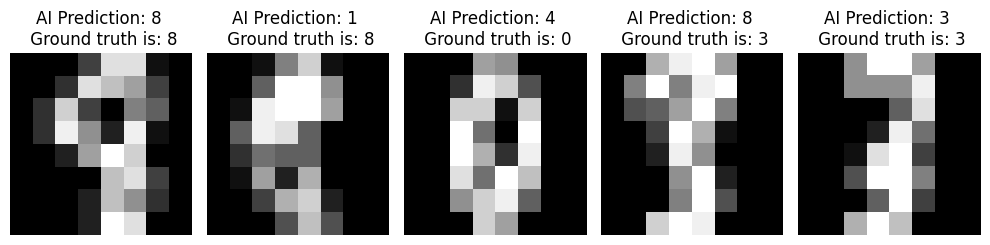

In [ ]:
import numpy as np
# 1.find all error indices predicted by the AI.
error = np.where(predicted_by_clf1 != y_test)[0]

print(f"AI missed {len(error)} times in {len(y_test)} simples.")

# 2.visualization of the first few error cases.
plt.figure(figsize=(10, 5)) # creat a figure with 10 width and 5 high

# we just care the first five errors
for i, error_index in enumerate(error[:5]):
    plt.subplot(1, 5, i + 1) # separate the canva into 1 row and five colums

    plt.imshow(X_test[error_index].reshape(8,8), cmap='gray')
    plt.title(f"AI Prediction: {predicted[error_index]} \n Ground truth is: {y_test[error_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

在這裡使用sklearn套件中的GridSearchCV，可以自動化的訓練指定的超參數組合，透過設定需要訓練的超參數，從中得出最佳的模型。

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split

# separate dataset into training set and testing set (using 80% of dataset for training, and the remaining part for testing)
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

param_grid = {
    'C':[1,10,100,100],
    'gamma':[0.001, 0.0001, 0.005],
    'kernel': ['rbf', 'linear']}

grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

print("最佳參數組合：", grid_search.best_params_)
print("最佳準確度：", grid_search.best_score_)

# 直接拿最強的模型來做測試
best_model = grid_search.best_estimator_
test_acc = best_model.score(X_test, y_test)
print(f"最強模型在測試集的表現: {test_acc * 100:.2f}%")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.000

最後一步，使用joblib套件，將最佳模型儲存成.pkl檔，未來便能直接使用不需重新訓練。

In [ ]:
import joblib
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']